# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [68]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [69]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [70]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)


In [71]:
# Fetch the Bitcoin news articles
btc_art = newsapi.get_everything(q="bitcoin", language="en")

In [72]:
# Fetch the Ethereum news articles
eth_art = newsapi.get_everything(q="ethereum", language="en")

In [73]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []
for article in btc_art["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment= analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
btc_df = pd.DataFrame(btc_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.tail()

,date,text,compound,positive,negative,neutral
15,2021-04-26,The two founders of Crusoe Energy think they m...,0.4215,0.158,0.066,0.777
16,2021-05-11,"Elon Musk really, REALLY likes Dogecoin. \r\nA...",0.7434,0.179,0.000,0.821
17,2021-05-16,"Hello friends, and welcome back to Week in Rev...",0.5707,0.159,0.067,0.773
18,2021-05-12,An Australian computer scientist who alleges h...,0.5994,0.213,0.052,0.736
19,2021-05-12,A representation of virtual currency Bitcoin a...,0.0000,0.000,0.000,1.000


In [74]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []
for article in eth_art["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment= analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
eth_df = pd.DataFrame(eth_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.tail()

,date,text,compound,positive,negative,neutral
15,2021-05-04,Sotheby's said on Tuesday it would accept bitc...,0.8176,0.210,0.0,0.790
16,2021-05-07,"NEW YORK, May 7 (Reuters) - Ethereum has outpe...",0.1027,0.046,0.0,0.954
17,2021-05-03,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.0,1.000
18,2021-05-02,By Reuters Staff\r\n(Adds detail of reported E...,0.0000,0.000,0.0,1.000
19,2021-05-07,Ethereum has outperformed major digital curren...,0.0516,0.038,0.0,0.962


In [75]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.0000
mean,0.296345,0.09005,0.028650,0.8814
std,0.392999,0.07716,0.047375,0.0893
min,-0.762700,0.00000,0.000000,0.7360
25%,0.000000,0.00000,0.000000,0.8190
50%,0.381800,0.07100,0.000000,0.8530
75%,0.577875,0.15975,0.055500,0.9565
max,0.845500,0.21700,0.180000,1.0000


In [76]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.079965,0.039850,0.015550,0.894600
std,0.275544,0.052982,0.040203,0.221424
min,-0.401900,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.915000
50%,0.000000,0.019000,0.000000,0.952500
75%,0.152575,0.067500,0.000000,1.000000
max,0.817600,0.210000,0.150000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [77]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [192]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
sw_addons = {"also", "basically", "just", "getty"}

In [193]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    lower = [word.lower() for word in tokens if word.lower() not in sw.union(sw_addons)]
    
    return lower

In [194]:
# Create a new tokens column for Bitcoin
btc_df["token"] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,token
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[shares, square, today, american, fintech, com..."
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000,"[tesla, relationship, bitcoin, dalliance, acco..."
3,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."
4,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[illustration, alex, castro, verge, cryptocurr..."


In [195]:
# Create a new tokens column for Ethereum
eth_df["token"] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,token
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, detrac..."
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917,"[solana, known, yet, outside, crypto, communit..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000,"[new, york, cnn, business, bitcoin, price, con..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909,"[creator, behind, cryptopunks, one, popular, n..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [196]:
from collections import Counter
from nltk import ngrams

In [197]:
# Generate the Bitcoin N-grams where N=2
N = 2
btc_grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
#Counter(btc_grams).most_common(20)

In [198]:
# Generate the Ethereum N-grams where N=2
N = 2
eth_grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
#Counter(eth_grams).most_common(20)

In [199]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [200]:
# Use token_count to get the top 10 words for Bitcoin
btc_count = token_count(btc_grams, N=10)
btc_count

[(('elon', 'musk'), 6),
 (('accepting', 'bitcoin'), 3),
 (('tesla', 'ha'), 3),
 (('char', 'tesla'), 2),
 (('char', 'image'), 2),
 (('ceo', 'elon'), 2),
 (('outage', 'morning'), 2),
 (('last', 'week'), 2),
 (('crypto', 'market'), 2),
 (('week', 'tesla'), 1)]

In [201]:
# Use token_count to get the top 10 words for Ethereum
eth_count = token_count(eth_grams, N=10)
eth_count

[(('char', 'reuters'), 4),
 (('reuters', 'staff'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'ethereum'), 4),
 (('ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [202]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

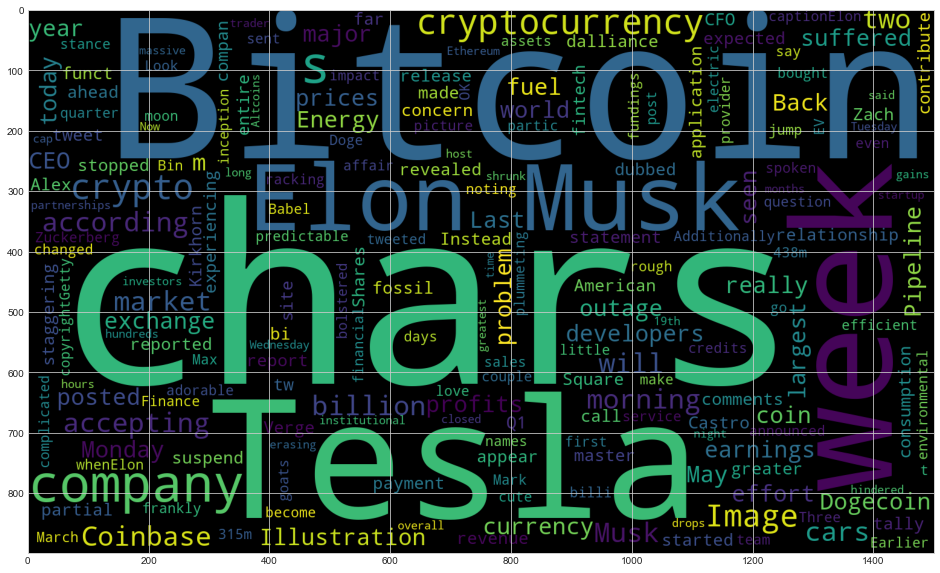

In [203]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud(width=1500, height=900).generate(btc_df.text.str.cat())
plt.imshow(btc_wc)

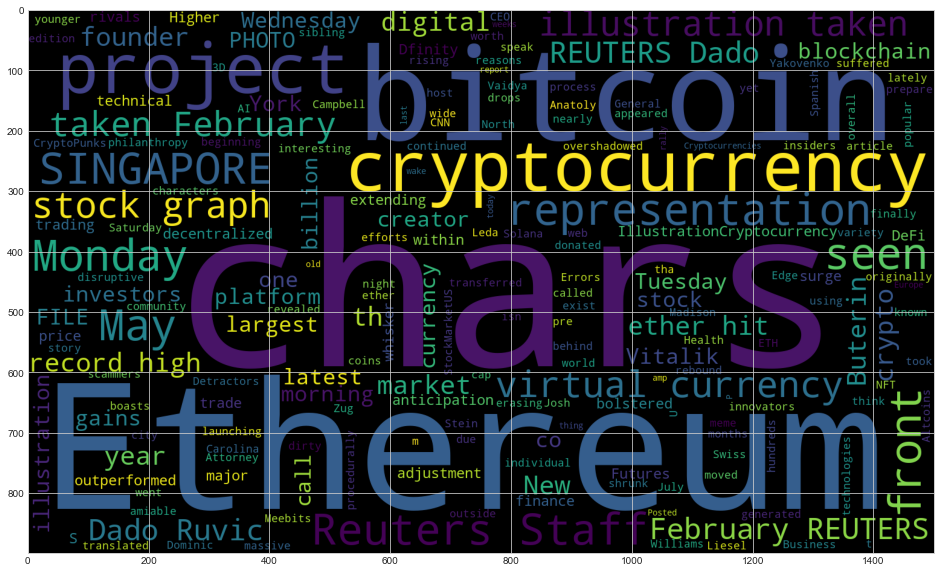

In [204]:
# Generate the Ethereum word cloud
eth_wc = WordCloud(width=1500, height=900).generate(eth_df.text.str.cat())
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [205]:
import spacy
from spacy import displacy

In [206]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [207]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [210]:
# Concatenate all of the Bitcoin text together
#new_btc_df = btc_df.drop(columns=["text"])
#new_btc_df
all_btc = btc_df.text.str.cat()
all_btc

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumption of fossil fuels, according to a statement CEO Elon Musk tw… [+853 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its 

In [226]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc)


# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin Articles"

In [227]:
# Render the visualization
displacy.render(btc_doc, style="ent")

In [234]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ["GPE", "ORG", "PERSON", "NORP"]]
btc_entities

['Tesla',
 'Bitcoin',
 'Elon Musk',
 'American',
 'CFO',
 'Zach Kirkhorn',
 'Tesla',
 'Elon Musk',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'Coinbase',
 'Bin',
 'Zuckerberg',
 'Max',
 'Bitcoin',
 'Musk',
 'Dogecoin',
 'Elon Musk',
 'Musk',
 'Tesla',
 'EV',
 'Musk',
 'Tesla',
 'Tesla',
 'Bitcoin',
 'Elon Musk',
 'Bitcoin',
 'Bitcoin',
 'Babel Finance',
 'Ethereum',
 'Altcoins',
 'CNN',
 'the United States',
 'Crusoe Energy',
 'Musk',
 'Dogecoin',
 'Trump',
 'Elon Musk’s',
 'Australian',
 'London High Court',
 'Bitcoin',
 'U.S.',
 'Dado Ruvic/File PhotoTesla Inc']

---

### Ethereum NER

In [235]:
# Concatenate all of the Ethereum text together
all_eth = eth_df.text.str.cat()
all_eth

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars]The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebits. The proj

In [236]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth)


# Add a title to the document
eth_doc.user_data["title"] = "Ethereum Articles"

In [237]:
# Render the visualization
displacy.render(eth_doc, style="ent")

In [238]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ["GPE", "ORG", "PERSON", "NORP"]]
eth_entities

['Vitalik Buterin',
 'Ethereum',
 'Ethereum',
 'Buterin',
 'ETH',
 'North Carolina',
 'Josh Stein',
 'Madison Campbell',
 'Liesel Vaidya',
 'Anatoly Yakovenko',
 'chars]New York',
 'CNN',
 'CryptoPunks',
 'NFT',
 '3D',
 'Ethereum',
 'Altcoins',
 'Reuters',
 'SINGAPORE',
 'Dado Ruvic/IllustrationCryptocurrency',
 'Dfinity',
 'Swiss',
 'Dominic Williams',
 'StockMarketUS Stock Futures Edge Higher',
 'U.S.',
 'Spanish',
 'AI',
 'Cryptocurrencies',
 'Vitalik Buterin',
 'Reuters',
 'SINGAPORE',
 'Reuters',
 'Dow Jones Indices',
 'Dado Ruvic/IllustrationCryptocurrency',
 'Banksy',
 'chars]NEW YORK',
 'Reuters',
 'Reuters',
 'SINGAPORE',
 'Reuters',
 'SINGAPORE',
 'Reuters']

---